## 4.5 규제가 있는 선형 모델

- 과대 적합을 감소시키기 위해서는 다항식의 차수를 감소시켜야 함.
- 선형 회귀 모델에서는 모델의 가중치를 제한함으로써 규제를 가하며 '릿지', '라쏘', '엘라스틱넷' 회귀가 있음

## 4.5.1 릿지 회귀

- 릿지 회귀는 규제가 추가된 선형 회귀 버전으로 규제항 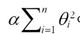이 비용 함수에 추가됨.
- 이는 학습 알고리즘을 데이터에 맞추는 것 뿐만 아니라 모델의 가중치가 가능한 작게 유지되도록 노력하며 규제항은 훈련하는 동안에만 비용함수에 추가되며 모델의 훈련이 끝나면 모델의 성능을 규제가 없는 성능 지표로 평가


- 하이퍼 파라미터 α는 모델이 얼마나 많이 규제할지를 조절

ex) α = 0이면 릿지 회귀는 선형 회귀와 같아지며 α가 아주 크면 모든 가중치가 거의 0에 가까워지고 결국 데이터의 평균을 지나는 수평선이 됨.

- 릿지 회귀의 비용 함수

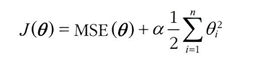

- 편향 θ0는 규제되지 않음, w를 특성의 가중치 벡터(θ1~θn)라고 정의함녀 규제항은  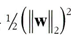과 같음.

- 경사 하강법에 적용하려면 MSE 그레이디언트 벡터에 αW를 더하면 됨.

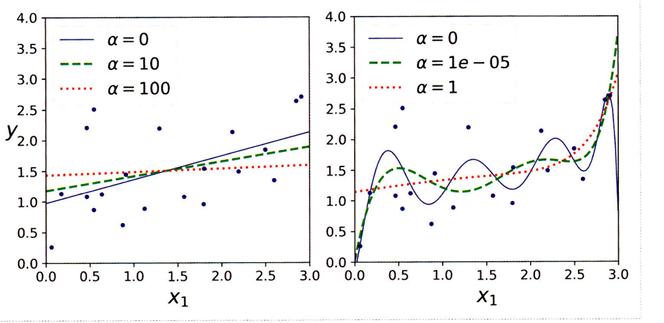

-> 오른쪽 그래프는 PolynomialFeatures을 사용해 먼저 데이터를 확장하고 StandardScaler를 사용해 스케일을 조정한 후 릿지 모델을 적용했고 α를 증가시킬수록 직선에 가까워지는 것을 살펴볼 수 있음. 즉, 모델의 분산은 줄지만 편향을 커지게 됨.

- 릿지 회귀를 계산하기 위해 정규방정식을 사용할 수도 있고 경사 하강법을 사용할 수도 있으나 장단점은 같음.

- 정규방정식의 해
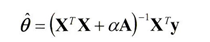

In [6]:
m=100
X = 6 * np.random.rand(m,1) -3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

In [7]:
# 데이터 임포트
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors),'r-+', linewidth=2, label='훈련 세트')
  plt.plot(np.sqrt(val_errors),'b-', linewidth=3, label='검정 세트')

In [8]:
# 정규방정식을 사용한 릿지 회귀를 적용한 예
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([4.85739594])

In [9]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty='l2') # 사용할 규제 지정, SGE가 비용 함수에 가중치벡터의 L2 노름의 제곱을 2로 나눈 규제항을 추가한 것
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([4.8362976])

## 4.5.2 라쏘 회귀
- 라쏘 회귀는 선형 회귀의 또 다른 규제된 버전으로 릿지 회귀처럼 비용 함수에 규제항을 더하지만 L2 노름의 제곱을 2로 나눈 것 대신 가중치 벡터의 L1 노름을 사용

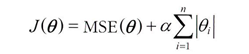




- 이전보다 릿지 모델 대신 라쏘 모델과 조금 더 작은 α값을 사용

- 라쏘 회귀는 덜 중요한 특성의 가중치를 제거하려하고 차수가 높은 다항 특성의 가중치를 모두 0으로 만듬, 자동으로 특성 선택을 하고 희소모델을 만듦.

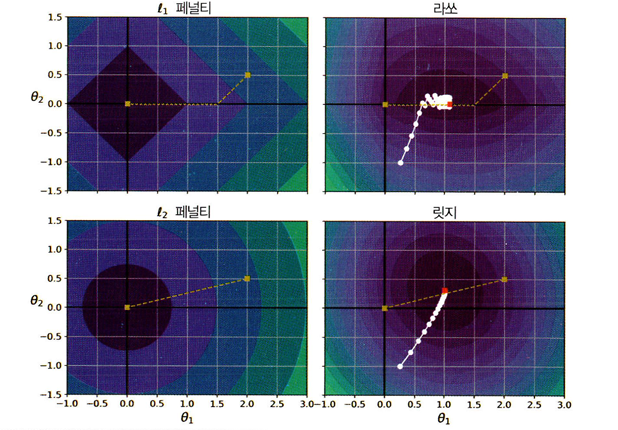

- 서브그레이디언트 벡터를 사용하면 경사 하강법을 적용하는 데 문제가 없음.
- 서브그레이디언트 벡터 공식

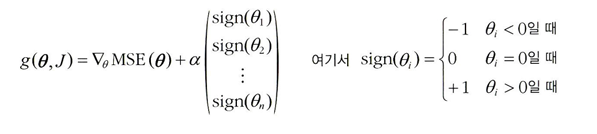



In [10]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.81219068])

## 4.5.2 엘라스틱넷

- 엘라스틱넷은 릿지 회귀와 라쏘 회귀를 절충한 모델로 규제항은 릿지와 회귀의 규제항을 단순히 더해서 사용하며, 혼합 정도는 혼합 비율 r을 사용해 조절
- r=0이면 엘라스틱넷은 릿지 회귀와 같고, r=1이면 라쏘 회귀와 같음

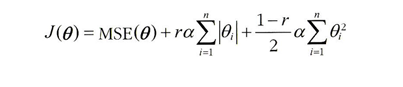


In [14]:
# ElasticNet 사용한 간단한 예제
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]]) # 새로운 데이터 [[1.5]]에 대한 예측값을 반환.

array([4.81201608])

## 4.5.2 조기 종료

- 경사하강법과 같은 반복적인 학습 알고리즘을 규제하는 방식은 검증 에러가 최솟값에 도달하면 바로 훈련을 중지시키는 것이며 이를 조기 종료라고 함.

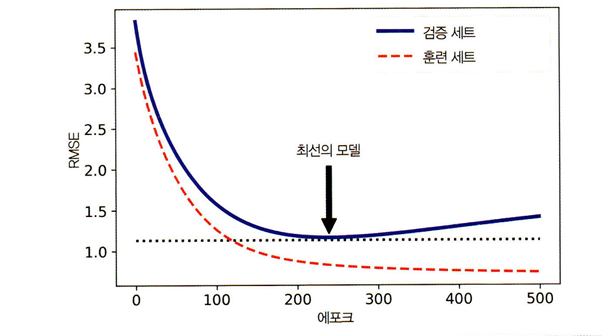

In [17]:
# 조기 종료 구현 코드
from sklearn.base import clone
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

# 데이터 준비
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])

import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)
sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train.ravel()) # 훈련을 이어서 진행
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

## 4.6 로지스틱 회귀
- 로지스틱회귀(로짓 회귀)는 샘플이 특정 클래스에 속할 확률을 추정하는 데 사용

## 4.6.1 확률 추정
- 로지스틱 회귀 모델은 입력 특성의 가중치 합을 계산해 로지스틱을 출력

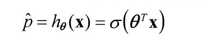

- 로지스틱 회귀 모델이 샘플 X가 양성 클래스에 속할 확률 P = h(x)를 추정함녀 이에 대한 예측값 y^를 쉽게 구할 수 있음

- y^
    - 0 P^< 0.5
    - 1 P^>=0.5

## 4.6.2 훈련과 비용 함수

- 로지스틱 회귀의 훈련 목적은 양성 샘플(y=1)에 대해서는 높은 확률을 추정하고 음성 샘플(y=0)에 대해서는 낮은 확률을 추정하는 모델의 파라미터 벡터 θ를 찾는 것임

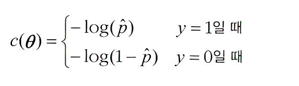

- 전체 훈련 세트에 대한 비용 함수는 모든 훈련 샘플의 비용을 평균한 것으로 로그 손실이라 불림.
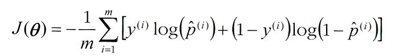

## 4.6.3 결정 경계


In [18]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [20]:
X = iris['data'][:,3:] # 꽃잎의 너비
y=(iris["target"]==2).astype(int) # 1 Iris-Vinginica면 1, 그렇지 않으면 0

In [21]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

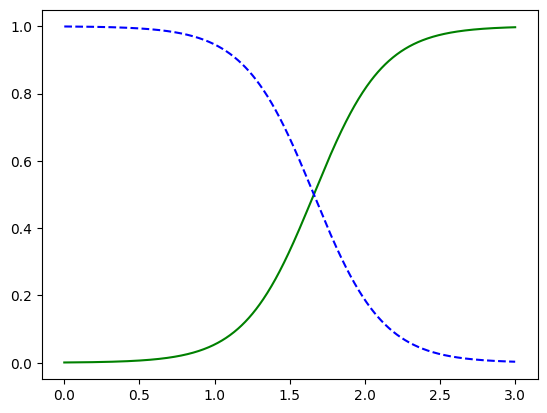

In [22]:
# 꽃잎의 너비가 0~3cm인 꽃에 대해 모델의 추정 확률을 계산
X_new = np.linspace(0, 3, 1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1],'g-', label = 'Iris virginica')
plt.plot(X_new, y_proba[:,0], 'b--', label='Not Iris virginica')

In [23]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

## 4.6.4 소프트맥스 회귀

- 여러 개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록 일반화하는 것을 소프트맥스 회귀, 다항 로지스틱 회귀라고 함.
- 샘플 x가 주어지면 먼저 소프트맥스 회귀 모델이 각 클래스 k에 대한 점수 sk(x)를 계산하고 그 점수에 소프트맥스 함수(정규화된 지수 함수)를 적용하여 각 클래스의 확률을 추정

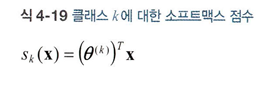


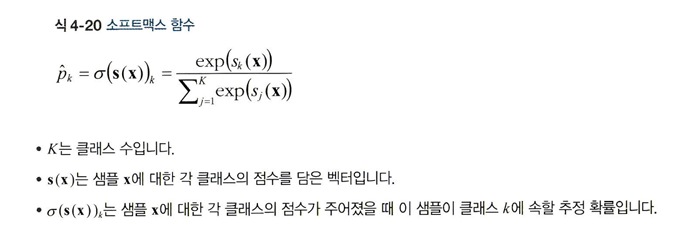

- 모델이 타깃 클래스에 대해서 높은 확률을 추정하도록 만드는 것이 목적이므로 크로스 엔트로피 비용 함수를 최소화하는 것은 타깃 클래스에 대해 낮은 확률을 예측하는 모델을 억제하므로 이 목적에 부합함. 크로스 엔트로피는 추정된 클래스의 확률이 타깃 클래스에 얼마나 잘 맞는지 측정하는 용도로 사용됨.
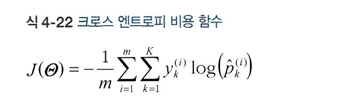

In [25]:
# 소프트 맥스 회귀를 사용해 붓꽃을 세 개의 클래스로 분류
X = iris['data'][:,(2,3)]
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=10, multi_class='multinomial')

In [28]:
print(softmax_reg.predict([[5,2]]))
print(softmax_reg.predict_proba([[5,2]]))

[2]
[[6.21626375e-07 5.73689803e-02 9.42630398e-01]]


- 클래스 사이의 결정 경계가 모두 선형이며 이 모델이 추정 확률 50%이하인 클래스를 예측할 수도 있음.

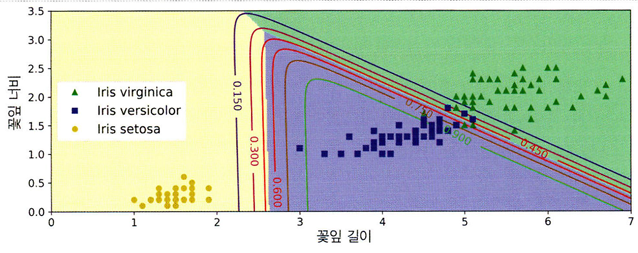